In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\PC\Desktop\6 projects\fire\train_data",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\PC\Desktop\6 projects\fire\test_images",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 129 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [36]:
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

In [37]:
# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)  # Slightly lower learning rate

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_fire_detection_model.keras', save_best_only=True)


In [40]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model
model.save('fire_detection_classifier_vgg16.keras')



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5069 - loss: 0.6985 - val_accuracy: 0.7500 - val_loss: 0.6234
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.5312 - loss: 0.7252 - val_accuracy: 0.7500 - val_loss: 0.6054
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6258 - loss: 0.6498 - val_accuracy: 0.7500 - val_loss: 0.5832
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.7188 - loss: 0.6085 - val_accuracy: 0.7500 - val_loss: 0.6112
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7335 - loss: 0.5277 - val_accuracy: 0.7500 - val_loss: 0.5551
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.6562 - loss: 0.6004 - val_accuracy: 0.7500 - val_loss: 0.5742
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.6948 - loss: 0.6304 - val_accuracy: 0.7500 - val_loss: 0.5221
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 1.0000 - loss: 0.2151 - val_accuracy: 0.7500 - val_loss: 0.5206


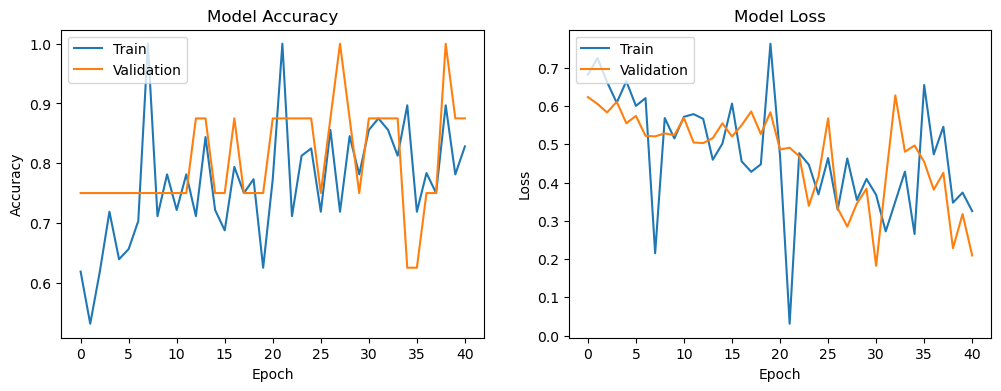

In [41]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Call the function to plot training history
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


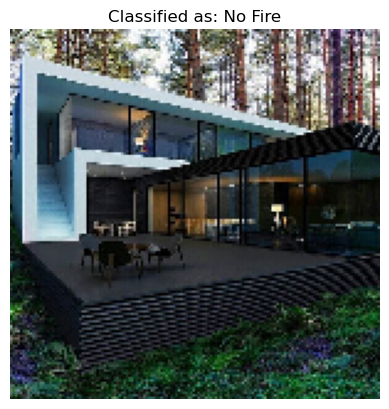

In [49]:
def classify_and_display_image(model, img_path, target_size=(150, 150)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale by 1./255

    # Predict using the model
    prediction = model.predict(img_array)
    
    # Interpret the prediction
    label = "No Fire" if prediction[0][0] > 0.5 else "Fire"

    # Display the image and its classification
    plt.imshow(img)
    plt.title(f'Classified as: {label}')
    plt.axis('off')
    plt.show()

# Example usage
model = tf.keras.models.load_model('best_fire_detection_model.keras')
classify_and_display_image(model, r"C:\Users\PC\Desktop\6 projects\7f2a8287b68c6d2ee768fff386efabc2.jpg")